# Snow depth comparaison between observation and simulation.
___
<div style="text-align: justify;">
Precipitation is corrected by taking account of temperature and wind in order to correct the miss catch of some particles.
Despite these corrections and the gap-filling, a significant difference remains between
the observed snow depth and the simulated snow depth using precipitation from the cor-
rected rain gauge data. Some snow events appear to be over-
estimated. A different method is then used to minimize the differences between snow depth observations and simulation. 
</div>

___
**Date** : 05/06/2025 \
**Written**  Glenn PITIOT

**Practical steps**: 
- Comparison of snow depth along the season and comparison with snow depth observation.

## Import libraries

In [1]:
import sys
import os
import matplotlib.pyplot as plt # For ploting
import pandas as pd # open csv 

sys.path.append(os.path.abspath("~/private-storage"))
from snowtools.utils.prosimu import prosimu_auto

## Import data : 
Import snow depth from Flux Alps measured by SnowView, and Crocus simulation with three different precipitation forcing files using the basic configuration of Crocus.

In [2]:
# Flux alpes meteo data cld 2024-2025 for snow depth
infile_name = "~/private-storage/Data_internship_2025_GP/Crocus/Gapfilled_data_FluxAlps_2024_2025/2024-2025_Lautaret_halfhour.csv"
Flux_alpe = pd.read_csv(infile_name, sep=",", index_col=0,)

folder_path = "~/private-storage/Data_internship_2025_GP/Crocus/Snow_depth_obs_VS_simu/"

# Simulation output from CROCUS for 2024-2025 with Obs precip.###########################################
simu_path = "Obs_precip/pro/PRO_2024101806_2025041806.nc"
path_Obs_precip = os.path.expanduser(folder_path + simu_path)

# Simulation output from CROCUS for 2024-2025 with CRO precip_ Interval 3h with complet depth snow : noSmooth.###########################################
simu_path = "CROprecip_3h_noSmooth/pro/PRO_2024101806_2025041806.nc"
path_CROprecip_3h_noSmooth = os.path.expanduser(folder_path + simu_path)

# Simulation output from CROCUS for 2024-2025 with CRO precip_ Interval 24h with complet depth snow : noSmooth.###########################################
simu_path = "CROprecip_24h_noSmooth/pro/PRO_2024101806_2025041806.nc"
path_CROprecip_24h_noSmooth = os.path.expanduser(folder_path + simu_path)

## Process Flux Alpes data:

In [3]:
# On met els date ne format datetime
Flux_alpe.index = pd.to_datetime(Flux_alpe.index)

# I Comparison of snow depth along the season

## I.1 Load data

In [4]:
# Simulation output from CROCUS for 2024-2025 with Obs precip.###########################################
with prosimu_auto(path=path_Obs_precip) as BK:
    time_Obs_precip= BK.readtime()
    snow_dph_Obs_precip = BK.read('DSN_T_ISBA')

# Simulation output from CROCUS for 2024-2025 with CRO precip_ Interval 3h with complet depth snow : noSmooth.###########################################   
with prosimu_auto(path=path_CROprecip_3h_noSmooth) as BK:
    time_CROprecip_3h_noSmooth= BK.readtime()
    snow_dph_CROprecip_3h_noSmooth = BK.read('DSN_T_ISBA')

# Simulation output from CROCUS for 2024-2025 with CRO precip_ Interval 24h with complet depth snow : noSmooth.###########################################
with prosimu_auto(path=path_CROprecip_24h_noSmooth) as BK:
    time_CROprecip_24h_noSmooth= BK.readtime()
    snow_dph_CROprecip_24h_noSmooth = BK.read('DSN_T_ISBA')

## I.2 Plot

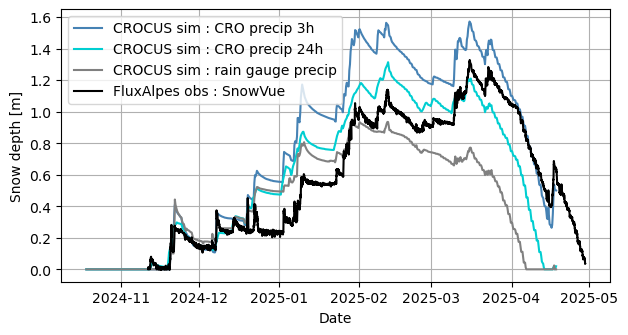

In [5]:
plt.figure(figsize=(2*3.54,3.54))    

plt.plot(time_CROprecip_3h_noSmooth, snow_dph_CROprecip_3h_noSmooth, label="CROCUS sim : CRO precip 3h",color = 'steelblue')
plt.plot(time_CROprecip_24h_noSmooth, snow_dph_CROprecip_24h_noSmooth, label="CROCUS sim : CRO precip 24h",color = 'darkturquoise')
# plt.plot(time_CROprecip_3h_smooth, snow_dph_CROprecip_3h_smooth, label="CRO precip, 3h Smooth")
plt.plot(time_Obs_precip,snow_dph_Obs_precip, label="CROCUS sim : rain gauge precip", color='grey')

plt.plot(Flux_alpe.index,Flux_alpe.Snow_Depth, label="FluxAlpes obs : SnowVue", color="black")
plt.ylabel("Snow depth [m]")
plt.xlabel("Date")
plt.grid()
plt.legend()

# Save
picture_folder = os.path.expanduser("~/private-storage/Photo_rapport/")
os.makedirs(picture_folder, exist_ok=True)

plt.savefig(os.path.join(picture_folder, "Comparison_of_different_precipitation_forcing.png"),
            dpi=300, bbox_inches='tight')

___
### Caption:
<div style="text-align: justify;">   

Observed snow depth (black) at Col du Lautaret from SnowView vs.
Crocus-simulated snow depth forced with various precipitation inputs: "Obs precip" uses
SnowView-observed precipitation; "CRO precip 3h no Smooth" and "CRO precip 24h no
Smooth" use reconstructed precipitation from snow depth using the Crocus density for-
mula over 3h and 24h intervals
</div>

___

### Result : 

<div style="text-align: justify;color:red">   
This study aims to accurately reproduce snow events during the melting season
(February to April). Among the tested configurations, the Crocus precipitation reconstruction using a 3 h interval provides the most satisfactory results for this time period.
Therefore, this 3 h precipitation reconstruct with Crocus formula, forcing file will be used
for the remainder of the study.
</div>